# Distance Metric Learning Example for SSL using pydml

https://www.jmlr.org/papers/volume21/19-864/19-864.pdf

In [1]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from dml import LMNN, NCA  # import it with pip install pydml
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix

np.random.seed(123456)


In [2]:
# Load the wine dataset.
X, y = load_wine(return_X_y=True)

# Normalize the data.
mms = MinMaxScaler()
X = mms.fit_transform(X)

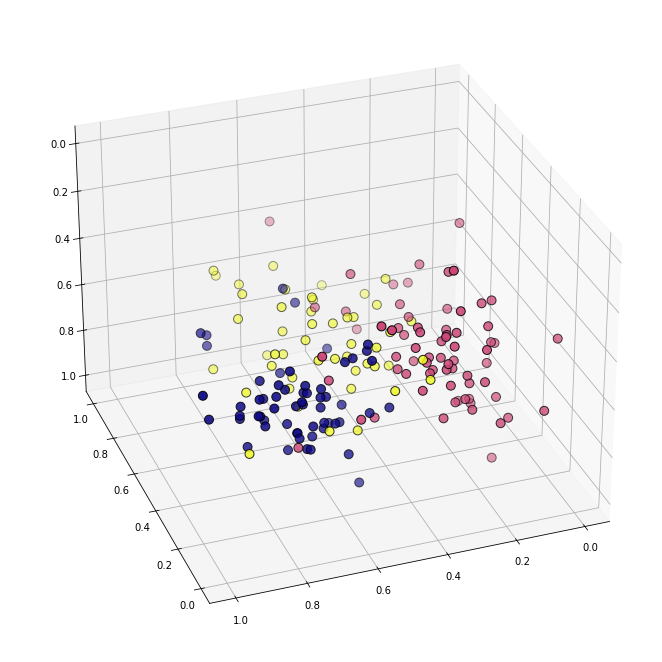

In [3]:
# Plot the data with the true labels.
fig = plt.figure(figsize=(9,9))
ax = Axes3D(fig, elev=-150, azim=110,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],
           c=y,
           cmap=plt.cm.plasma,
           edgecolor="k",
           s=80,
           )


In [4]:
# Apply the k-means algorithm to the data and compare with the original labels.
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)
y_pred = kmeans.predict(X)

Text(0.5, 0.92, 'True labels')

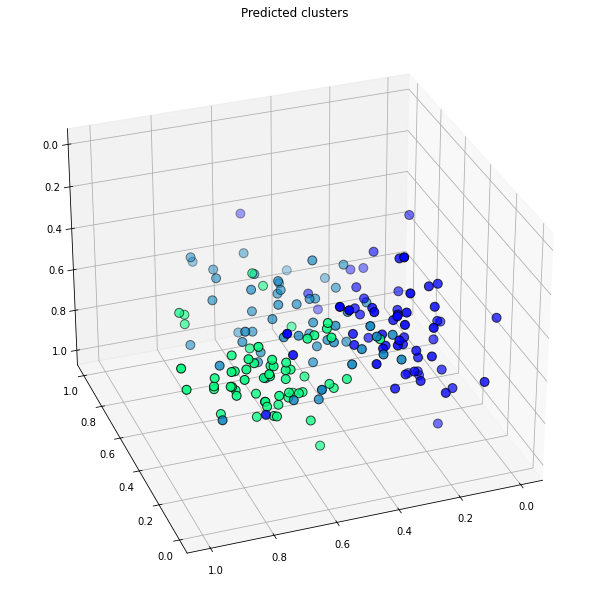

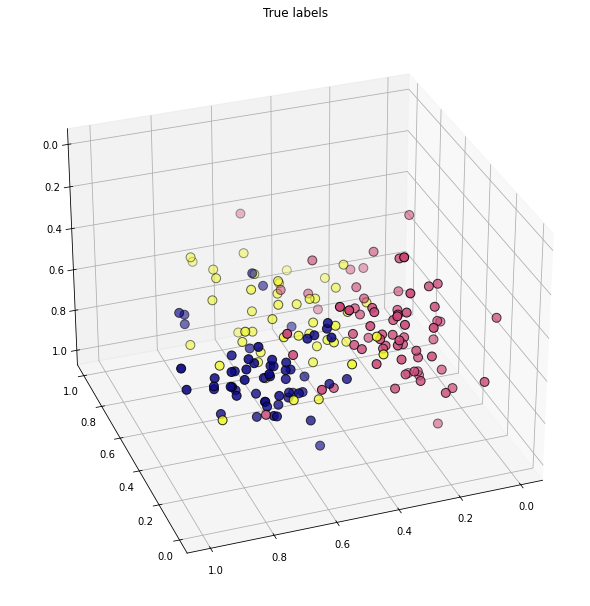

In [5]:
# Plot the data with both the true and the predicted labels
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, elev=-150, azim=110,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],
           c=y_pred,
           cmap=plt.cm.winter,
           edgecolor="k",
           s=80,
           )
ax.set_title("Predicted clusters")

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, elev=-150, azim=110,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],
           c=y,
           cmap=plt.cm.plasma,
           edgecolor="k",
           s=80,
           )
ax.set_title("True labels")


In [6]:
# Get the confusion matrix and the prediction accuracy.
cm = confusion_matrix(y, y_pred)

# Assign the clusters labels to the most-matching true labels.
cm_argmax = cm.argmax(axis=0)
y_pred_match = np.array([cm_argmax[i] for i in y_pred])

cm_match = confusion_matrix(y, y_pred_match)
print("Confusion matrix:\n", cm_match)

# Print the accuracy
accuracy = np.trace(cm_match) / np.sum(cm_match)
print("Accuracy:", accuracy)


Confusion matrix:
 [[59  0  0]
 [ 2 62  7]
 [ 0  0 48]]
Accuracy: 0.949438202247191


In [7]:
# Fit the NCA algorithm to the data.
nca = NCA(eta0=0.1, max_iter=100)
nca.fit(X, y)
# Transform the data with the learned transformation.
LX1 = nca.transform(X)


Text(0.5, 0.92, 'True labels')

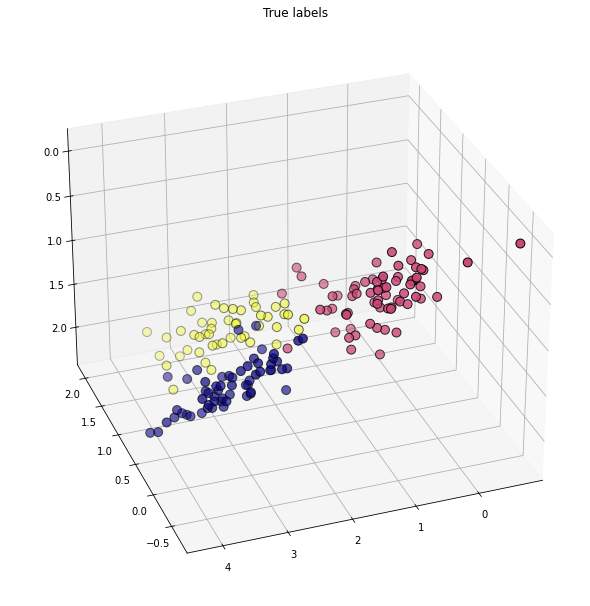

In [8]:
# Plot the transformed data with the true labels
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, elev=-150, azim=110,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(LX1[:, 0], LX1[:, 1], LX1[:, 2],
           c=y,
           cmap=plt.cm.plasma,
           edgecolor="k",
           s=80,
           )
ax.set_title("True labels")

In [9]:
# Apply the k-means algorithm to the transformed data and compare with the original labels.
kmeans1 = KMeans(n_clusters=3, random_state=1)
kmeans1.fit(LX1)
y_pred1 = kmeans1.predict(LX1)

Text(0.5, 0.92, 'True labels')

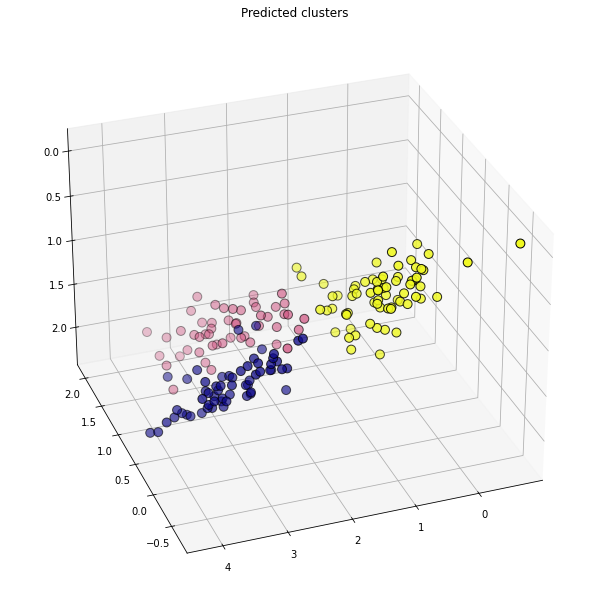

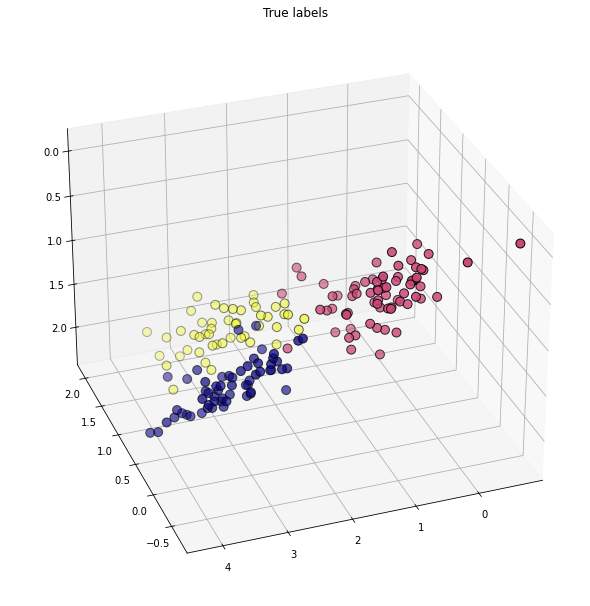

In [10]:
# Plot the transformed data with both the true and the predicted labels
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, elev=-150, azim=110,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(LX1[:, 0], LX1[:, 1], LX1[:, 2],
            c=y_pred1,
            cmap=plt.cm.plasma,
            edgecolor="k",
            s=80,
)
ax.set_title("Predicted clusters")

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, elev=-150, azim=110,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(LX1[:, 0], LX1[:, 1], LX1[:, 2],
            c=y,
            cmap=plt.cm.plasma,
            edgecolor="k",
            s=80,
)
ax.set_title("True labels")

In [11]:
# Get the confusion matrix and the prediction accuracy.
cm1 = confusion_matrix(y, y_pred1)

# Assign the clusters labels to the most-matching true labels.
cm1_argmax = cm1.argmax(axis=0)
y_pred1_match = np.array([cm1_argmax[i] for i in y_pred1])

cm1_match = confusion_matrix(y, y_pred1_match)
print("Confusion matrix:\n", cm1_match)

# Print the accuracy
accuracy = np.trace(cm1_match) / np.sum(cm1_match)
print("Accuracy:", accuracy)


Confusion matrix:
 [[59  0  0]
 [ 0 69  2]
 [ 0  0 48]]
Accuracy: 0.9887640449438202


In [12]:
# Fit the LMNN algorithm to the data.
lmnn = LMNN(k=3, max_iter=20, tol=1e-6)
lmnn.fit(X, y)

# Transform the data with the learned transformation.
LX2 = lmnn.transform(X)

Text(0.5, 0.92, 'True labels')

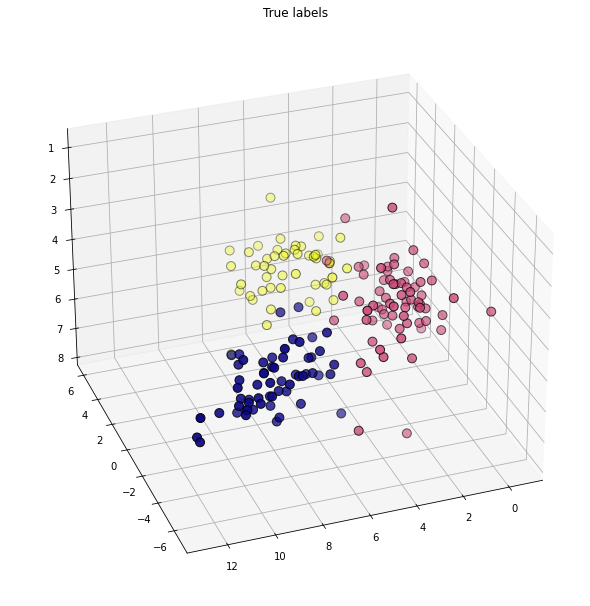

In [13]:
# Plot the transformed data with the true labels
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, elev=-150, azim=110,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(LX2[:, 0], LX2[:, 1], LX2[:, 2],
           c=y,
           cmap=plt.cm.plasma,
           edgecolor="k",
           s=80,
           )
ax.set_title("True labels")

In [14]:
# Apply the k-means algorithm to the transformed data and compare with the original labels.
kmeans2 = KMeans(n_clusters=3, random_state=1)
kmeans2.fit(LX2)
y_pred2 = kmeans2.predict(LX2)


Text(0.5, 0.92, 'True labels')

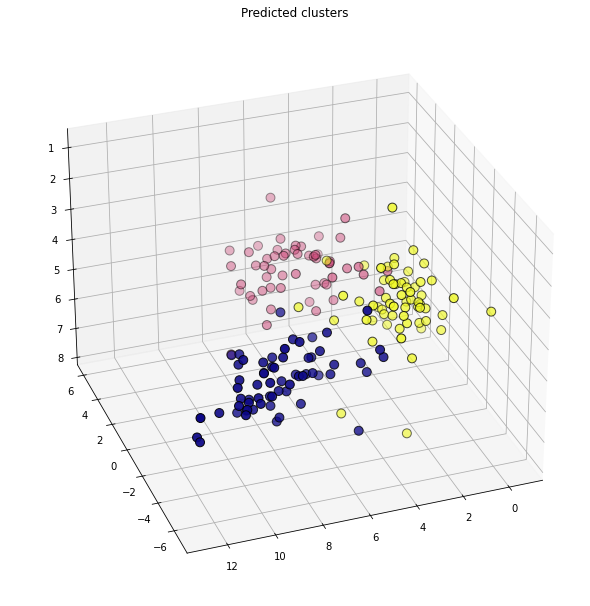

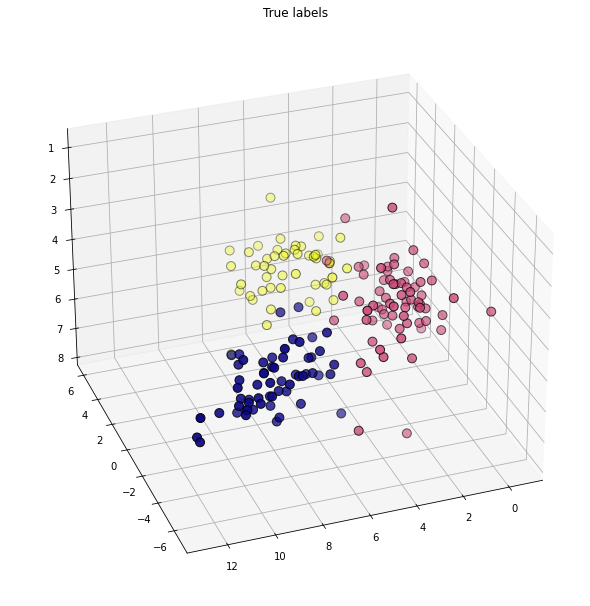

In [15]:
# Plot the transformed data with both the true and the predicted labels
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, elev=-150, azim=110,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(LX2[:, 0], LX2[:, 1], LX2[:, 2],
            c=y_pred2,
            cmap=plt.cm.plasma,
            edgecolor="k",
            s=80,
)
ax.set_title("Predicted clusters")

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, elev=-150, azim=110,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(LX2[:, 0], LX2[:, 1], LX2[:, 2],
            c=y,
            cmap=plt.cm.plasma,
            edgecolor="k",
            s=80,
)
ax.set_title("True labels")

In [16]:
# Get the confusion matrix and the prediction accuracy.
cm2 = confusion_matrix(y, y_pred2)

# Assign the clusters labels to the most-matching true labels.
cm2_argmax = cm2.argmax(axis=0)
y_pred2_match = np.array([cm2_argmax[i] for i in y_pred2])

cm2_match = confusion_matrix(y, y_pred2_match)
print("Confusion matrix:\n", cm2_match)

# Print the accuracy
accuracy = np.trace(cm2_match) / np.sum(cm2_match)
print("Accuracy:", accuracy)



Confusion matrix:
 [[57  2  0]
 [ 6 59  6]
 [ 0  0 48]]
Accuracy: 0.9213483146067416
